## Auto EDA
### Functions
- Analyze ()
- Compare ()
- Compare_intra()

In [2]:
# install sweetviz
#!pip install sweetviz

In [1]:
#pip install "pandas==1.5.3"

In [3]:
#pip install --upgrade sweetviz

In [1]:
pip install "sweetviz==2.1.4" "pandas==1.5.3"

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the data
import pandas as pd
data_q1 = pd.read_csv("Q1_final.csv")

In [3]:
data_q2 = pd.read_csv("Q2_scaled.csv")

In [4]:
import sweetviz as sv

/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [29]:
import sweetviz.series_analyzer as sa
import pandas as pd

sa.get_counts = lambda series: series.value_counts(dropna=False).reset_index().rename(columns={series.name:"index"}).set_index("index").iloc[:,0]


In [6]:
data_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1725 non-null   int64  
 1   Life expectancy         1723 non-null   float64
 2   Adult Mortality         1723 non-null   float64
 3   infant deaths           1725 non-null   int64  
 4   Alcohol                 1608 non-null   float64
 5   percentage expenditure  1725 non-null   float64
 6   Measles                 1725 non-null   int64  
 7    BMI                    1709 non-null   float64
 8   under-five deaths       1725 non-null   int64  
 9   Polio                   1714 non-null   float64
 10  Total expenditure       1612 non-null   float64
 11  Diphtheria              1714 non-null   float64
 12   HIV/AIDS               1725 non-null   float64
 13  GDP                     1725 non-null   float64
 14  Population              1725 non-null   

In [7]:
data_q1 = data_q1.drop(columns=["Unnamed: 0"], errors="ignore")

In [8]:
data_q1.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,572.347796,17.5,10.0
1,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,1922.747513,17.9,9.8
2,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,1725.861814,18.2,9.5
3,58.8,279.0,74,0.01,79.679367,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,1697.989105,18.4,9.2
4,58.6,281.0,77,0.01,56.762217,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,533.226969,18.6,8.9


In [9]:
data_q1 = data_q1.dropna(subset = ['Life expectancy '])

In [30]:
# Show colums to see all characters
print([repr(c) for c in data_q1.columns])

# Check exact match
print("Exact match?",
      "Life expectancy" in data_q1.columns)

["'index'", "'Life expectancy '", "'Adult Mortality'", "'infant deaths'", "'Alcohol'", "'percentage expenditure'", "'Measles '", "' BMI '", "'under-five deaths '", "'Polio'", "'Total expenditure'", "'Diphtheria '", "' HIV/AIDS'", "'GDP'", "'Population'", "'thinness  1-19 years'", "'Schooling'"]
Exact match? False


In [11]:
data_q1 = data_q1.reset_index()

In [12]:
for c in data_q1.columns:
    print(repr(c))


'index'
'Life expectancy '
'Adult Mortality'
'infant deaths'
'Alcohol'
'percentage expenditure'
'Measles '
' BMI '
'under-five deaths '
'Polio'
'Total expenditure'
'Diphtheria '
' HIV/AIDS'
'GDP'
'Population'
'thinness  1-19 years'
'Schooling'


In [13]:
# Create Data Frame

import pandas as pd
import sweetviz as sv
import importlib
import sweetviz.series_analyzer as sa
import numpy as np, warnings
np.warnings = warnings 

importlib.reload(sa)

# Clean data
df = data_q1.copy()
df.columns = df.columns.str.strip()       

target = "Life expectancy"                 
df[target] = pd.to_numeric(df[target], errors="coerce")
df = df[df[target].notna()].copy()

report = sv.analyze(df, target_feat=target, pairwise_analysis="off")
report.show_html("sweetviz_q1.html", open_browser=False)
print("Sweetviz report saved to sweetviz_q1.html")


/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |         | [  0%]   00:00 -> (? left)

/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packag

Report sweetviz_q1.html was generated.
Sweetviz report saved to sweetviz_q1.html


/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()


In [25]:
from IPython.display import IFrame
IFrame(src='sweetviz_q1.html', width=1000, height=600)


In [15]:
import sweetviz as sv
import numpy as np, warnings

np.warnings = warnings

df2 = data_q2.copy()
df2.columns = df2.columns.str.strip()  

target2 = "Life expectancy"

df2[target2] = pd.to_numeric(df2[target2], errors="coerce")
df2 = df2[df2[target2].notna()].copy()

report2 = sv.analyze(df2, target_feat=target2, pairwise_analysis="off")


/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |         | [  0%]   00:00 -> (? left)

/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packag

In [17]:
from IPython.display import IFrame
IFrame("sweetviz_q2.html", width=1000, height=600)


## Compare the two datasets 

In [20]:
import sweetviz as sv
from IPython.display import IFrame
import numpy as np, warnings
np.warnings = warnings 
# Clean both datasets
df1 = data_q1.copy()
df1.columns = df1.columns.str.strip()
df1["Life expectancy"] = pd.to_numeric(df1["Life expectancy"], errors="coerce")
df1 = df1[df1["Life expectancy"].notna()]

df2 = data_q2.copy()
df2.columns = df2.columns.str.strip()
df2["Life expectancy"] = pd.to_numeric(df2["Life expectancy"], errors="coerce")
df2 = df2[df2["Life expectancy"].notna()]

# Compare datasets
compare_report = sv.compare([df1, "Dataset 1"], [df2, "Dataset 2"], target_feat="Life expectancy")

# Show
IFrame("sweetviz_compare.html", width=1000, height=600)



/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:92: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_compare_names = [cur_name for cur_name, cur_series in compare_df.iteritems()]
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |         | [  0%]   00:00 -> (? left)

/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packag

In [27]:
import sweetviz as sv
from IPython.display import IFrame
import numpy as np, warnings
np.warnings = warnings

# df1 prepared earlier from data_q1, columns already stripped
target = "Life expectancy"

# Build a boolean mask
gdp_med = df1["GDP"].median()
mask = df1["GDP"] >= gdp_med

intra_report = sv.compare_intra(
    df1,
    mask,
    ["High GDP", "Low GDP"],
    target_feat=target
)

IFrame("sweetviz_intra_gdp.html", width=1000, height=600)


/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:92: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_compare_names = [cur_name for cur_name, cur_series in compare_df.iteritems()]
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |         | [  0%]   00:00 -> (? left)

/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packag

In [24]:
for c in df1.columns: 
    print(repr(c))

'index'
'Life expectancy'
'Adult Mortality'
'infant deaths'
'Alcohol'
'percentage expenditure'
'Measles'
'BMI'
'under-five deaths'
'Polio'
'Total expenditure'
'Diphtheria'
'HIV/AIDS'
'GDP'
'Population'
'thinness  1-19 years'
'Schooling'


## Explanation of the three reports
- In my first Sweetviz report (analyze), I noticed that life expectancy is related to features like Schooling, GDP, and health expenditures, and decreases with the increasing Adult Mortality and HIV/AIDS rate. Missing values were present in some features, such as Alcohol consumption, BMI, Polio, and Total expenditure, which is an issue that could influence the performance of the model. In conclusion, this report found that countries with better education and healthcare tend to have longer life expectancy.

- In the second report (compare), I compared data_q1 with data_q2. While these data had similar behavior, the distributions of certain features looked different because they were processed differently on each dataset. Data_q2, for instance, is more normal and does not have as many missing values, so it can be used for investigation. This demonstrates the degree to which the manner in which we develop and clean datasets can change the effect of a model.

- In the third report (compare_intra), I compared 2 groups within the dataset (high GDP versus low GDP countries, eg). These findings confirmed that countries with high GDP have relatively longer life expectancies, more people are educated, and lower mortality. Conversely, the pattern was reversed for low-GDP countries. This indicates that the correlation between these different features and life expectancy in all countries was not equivalent across them. When I checked on linear regression, the quality of the data is how much it matters. If the dataset lacks any input or contains any values inconsistent with each other from data_q1, the regression model would have lower accuracy. On the contrary, a cleaner set of data (like data_q2) would yield better regression results by improving interpretation and making more accurate predictions about which set of features is more likely to fit target variables. The intra comparison also shows that one regression model may do in part by completely underperforming for both groups (rich vs poor countries). Thus, model performance might be satisfactory only to one group but not the other.

  In summary, the three reports demonstrated that data quality, preprocessing, and variable sub-group differences determine how effectively a linear regression model predicts life expectancy. That cleaner data increases accuracy, and performing subgroup analysis reveals scenarios where one model (or worse) is insufficient.

## Impact on linear regression model perfomance
#### 1. Quality of Data (Analyze Report)

- Missing values in Alcohol, BMI, Polio, etc., may reduce regression accuracy.

- Dropping or imputing them changes model stability.

- Features with strong linear correlations (e.g., Schooling with Life expectancy) improve regression performance.

#### 2. Differences Across Datasets (Compare Report)
- If data_q2 is normalized/standardized, regression coefficients are more stable and interpretable.

- A noisier dataset (data_q1) may yield lower R² and higher error metrics.

- Thus, preprocessing has a direct impact on regression model performance.

#### 3. Subgroup Effects (Compare Intra Report)
- Regression fit may differ across groups (e.g., High GDP vs Low GDP countries).

- The model might underperform if trained on one group but tested on another (generalization problem).

- Observing subgroup differences suggests the possible need for interaction terms or separate models.

## Linear Regression Graph

/Users/mirac/PycharmProjects/PythonProject2/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


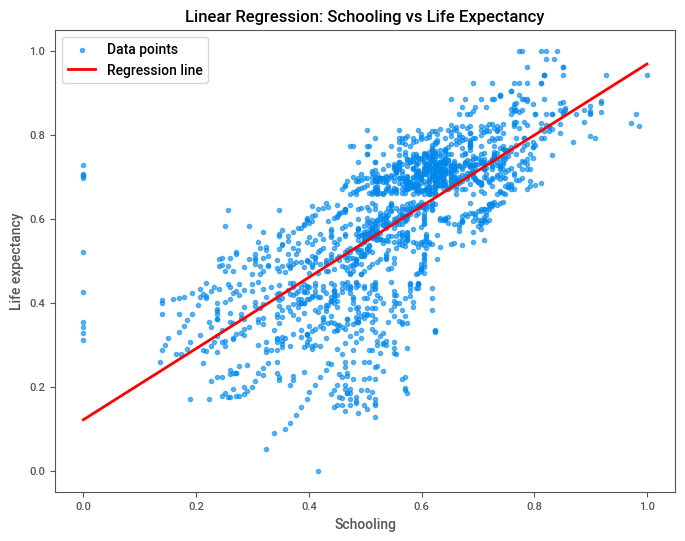

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prep dataset
df = data_q2.copy()
df.columns = df.columns.str.strip()
df = df.dropna(subset=["Life expectancy", "Schooling"])   # drop rows missing target or predictor

# Predictor
X = df[["Schooling"]] 
y = df["Life expectancy"]

# Linear Regression fit
model = LinearRegression()
model.fit(X, y)

# Line prediction
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plot graph
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.6, label="Data points")
plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Linear Regression: Schooling vs Life Expectancy")
plt.legend()
plt.show()
